# Assignment Python 3
Nama : Syaima Radestya <br>
Kode Peserta : PYTN-KS10-011 <br>
Program : Introduction to Python for Data Science <br>

# Project Overview
***
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. <br> <br>
There are four datasets:

1. **bank-additional-full.csv** with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. **bank-additional.csv** with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. **bank-full.csv** with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. **bank.csv** with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). <br> <br>
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## 1. Import Libraries
***
Import required libraries (mengimport beberapa library yang akan digunakan)

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# tools visualisasi
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Process
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn import metrics
import statsmodels.api as sm

%matplotlib inline

## 2. Exploring and Preprocessing Dataset
***

In [2]:
# memasukkan dataset ke dalam pandas dataframe
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# mengetahui dimensi dataframe
df.shape


(41188, 21)

In [5]:
# melihat info tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# melihat list dari column headers
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [7]:
# melihat list index
df.index.values

array([    0,     1,     2, ..., 41185, 41186, 41187], dtype=int64)

### Mengelompokkan atribut berdasarkan tipe datanya

In [8]:
kolom_numerik = list(df.select_dtypes(include=['int64']).columns.values) + list(df.select_dtypes(include=['float64']).columns.values)
kolom_kategori = list(df.select_dtypes(include=['object']))

In [9]:
# variable numerik
kolom_numerik

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [10]:
# variable kategori
kolom_kategori

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

### Deskriptif statistik untuk kolom numerical

In [11]:
df[kolom_numerik].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
# mengetahui jumlah data untuk masing-masing kelas
df.groupby('y').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
yes,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


**Analisa:** Bank Additional memiliki dimensi data sejumlah 41188 rows dan 21 columns. Terlihat pada bagian info dataset tidak ada missing values, yang nantinya dibagian selanjutnya akan saya periksa. Data latih memiliki 36548 label "no" dan 4640 label "yes"

## Data Cleaning
***

In [13]:
# jumlah unknown pada dataset
df[df[kolom_kategori]=='unknown'].count().sort_values(ascending=False)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64

In [14]:
# mengganti unknown dengan NumPy NaN
df[df[kolom_kategori]=='unknown'] = np.nan

In [15]:
# periksa kembali
df[df[kolom_kategori]=='unknown'
].count().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [16]:
# melihat unstandard missing values pada kolom kategori
df[kolom_kategori].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,NaN,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [17]:
# melihat unique values pada kolom kategori
for cat_col in kolom_kategori:
    print('UNIQUE VALUE FOR COLUMN ', cat_col.upper())
    print(df[cat_col].unique())
    print('='*75)

UNIQUE VALUE FOR COLUMN  JOB
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']
UNIQUE VALUE FOR COLUMN  MARITAL
['married' 'single' 'divorced' nan]
UNIQUE VALUE FOR COLUMN  EDUCATION
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']
UNIQUE VALUE FOR COLUMN  DEFAULT
['no' nan 'yes']
UNIQUE VALUE FOR COLUMN  HOUSING
['no' 'yes' nan]
UNIQUE VALUE FOR COLUMN  LOAN
['no' 'yes' nan]
UNIQUE VALUE FOR COLUMN  CONTACT
['telephone' 'cellular']
UNIQUE VALUE FOR COLUMN  MONTH
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
UNIQUE VALUE FOR COLUMN  DAY_OF_WEEK
['mon' 'tue' 'wed' 'thu' 'fri']
UNIQUE VALUE FOR COLUMN  POUTCOME
['nonexistent' 'failure' 'success']
UNIQUE VALUE FOR COLUMN  Y
['no' 'yes']


In [18]:
# melihat unstandard missing values pada kolom numerik
df[kolom_numerik].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [19]:
# melihat unique values pada kolom numerik
for cat_col in kolom_numerik:
    print('UNIQUE VALUE FOR COLUMN ', cat_col.upper())
    print(df[cat_col].unique())
    print('='*75)

UNIQUE VALUE FOR COLUMN  AGE
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
UNIQUE VALUE FOR COLUMN  DURATION
[ 261  149  226 ... 1246 1556 1868]
UNIQUE VALUE FOR COLUMN  CAMPAIGN
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
UNIQUE VALUE FOR COLUMN  PDAYS
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
UNIQUE VALUE FOR COLUMN  PREVIOUS
[0 1 2 3 4 5 6 7]
UNIQUE VALUE FOR COLUMN  EMP.VAR.RATE
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
UNIQUE VALUE FOR COLUMN  CONS.PRICE.IDX
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.6

In [20]:
# change 999 value in pdays
df['pdays'].replace(999,0, inplace=True)

In [21]:
# total missing values
print("Jumlah nan pada atribut kategori = ",df[kolom_kategori].isnull().sum().sum())
print("Jumlah nan pada atribut numerikal = ",df[kolom_numerik].isnull().sum().sum())

Jumlah nan pada atribut kategori =  12718
Jumlah nan pada atribut numerikal =  0


### Untuk data kategorikal, missing values akan diisi dengan modus, sedangkan untuk data numerikal, missing values akan diisi dengan median.

In [22]:
# data kategorikal
df_categorical = df[kolom_kategori]

# ddata numerikal
df_numerical = df[kolom_numerik]

In [23]:
# instansiasi kelas SimpleImputer untuk imputer atribut kategorikal
kategori_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [24]:
# fit dengan data training
kategori_imputer.fit(df_categorical)

SimpleImputer(strategy='most_frequent')

In [25]:
# transform ke data latih
df_categorical = kategori_imputer.transform(df_categorical)

In [26]:
# buat hasil array ke dalam dataframe
df_categorical = pd.DataFrame(df_categorical, columns=kolom_kategori)

In [27]:
# menggabung categorical columns dengan numerical columns
df = pd.concat([df_numerical,df_categorical],axis=1)

### Mengecek ulang jumlah nan (missing values)

In [28]:
print("Jumlah nan pada atribut kategori = ",df[kolom_kategori].isnull().sum().sum())
print("Jumlah nan pada atribut numerikal = ",df[kolom_numerik].isnull().sum().sum())

Jumlah nan pada atribut kategori =  0
Jumlah nan pada atribut numerikal =  0


### Rename kolom

In [29]:
df.rename(columns={
    'day_of_week':'day',
    'y':'deposit',
    'pdays':'number of days passed',
    'emp.var.rate':'level of job variety',
    'cons.price.idx':'consumer price index',
    'cons.conf.idx':'consumer confidence index',
    'euribor3m':'rate euribor 3 month',
    'nr.employed':'number of employees',
},inplace=True)

In [30]:
df.head()

,age,duration,campaign,number of days passed,previous,level of job variety,consumer price index,consumer confidence index,rate euribor 3 month,number of employees,...,marital,education,default,housing,loan,contact,month,day,poutcome,deposit
0,56,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,57,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,37,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,40,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,56,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


**Analisa:** Dapat dilihat pada atribut pdays ada nilai 999 yang menandakan klien sebelumnya tidak dihubungi. Angka tersebut bisa diganti dengan nilai 0 Setelah diperiksa jumlah nan (missing values) pada dataframe, ternyata hanya data kategorikal yang mengandung missing values dan data numerikal tidak mengandung missing values. Setelah dilakukan imputasi, tidak ada missing values yang tersisa

## 3. Visualization Data
***
Pada bagian ini, saya akan melakukan visualisasi sederhana pada data

### Question
1. Bagaimana visualisasi berdasarkan banyaknya data di kolom deposit?

In [31]:
# apply a style to matplotlib
mpl.style.use(['ggplot'])

In [32]:
df['deposit'].value_counts()

no     36548
yes     4640
Name: deposit, dtype: int64

c:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\style.py:123: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


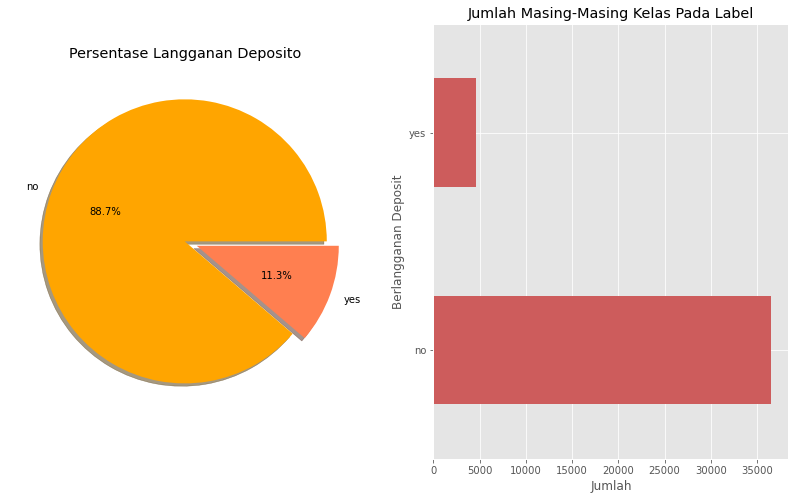

In [33]:
fig, ax = plt.subplots(1,2,figsize=(17,9))

# persentase langganan deposito
df['deposit'].value_counts().plot(
    kind='pie',
    autopct='%.1f%%',
    colors=['orange','coral'],
    explode=[0,0.09], 
    cmap='cool',
    shadow=True,
    ax=ax[0]
)
ax[0].set_title('Persentase Langganan Deposito')
ax[0].set_ylabel('')

# Generate Plot Barchart
df['deposit'].value_counts().plot(kind="barh", figsize=(14,8), color='indianred')

plt.title('Jumlah Masing-Masing Kelas Pada Label') # add title to the plot
plt.ylabel('Berlangganan Deposit') # add to x-label to the plot
plt.xlabel('Jumlah') # add y-label to the plot
plt.show()

**Kesimpulan:** Dapat dilihat pada visualisasi diatas bahwa nilai **no** memiliki jumlah sekitar **7x lebih banyak** dibandingkan nilai **yes**. Jadi, ada ketidaksamaan jumlah dari setiap nilai yang terdapat pada label kelas.

### Question
2. Bagaimana visualisasi berdasarkan kolom education dengan banyaknya data di kolom deposit?

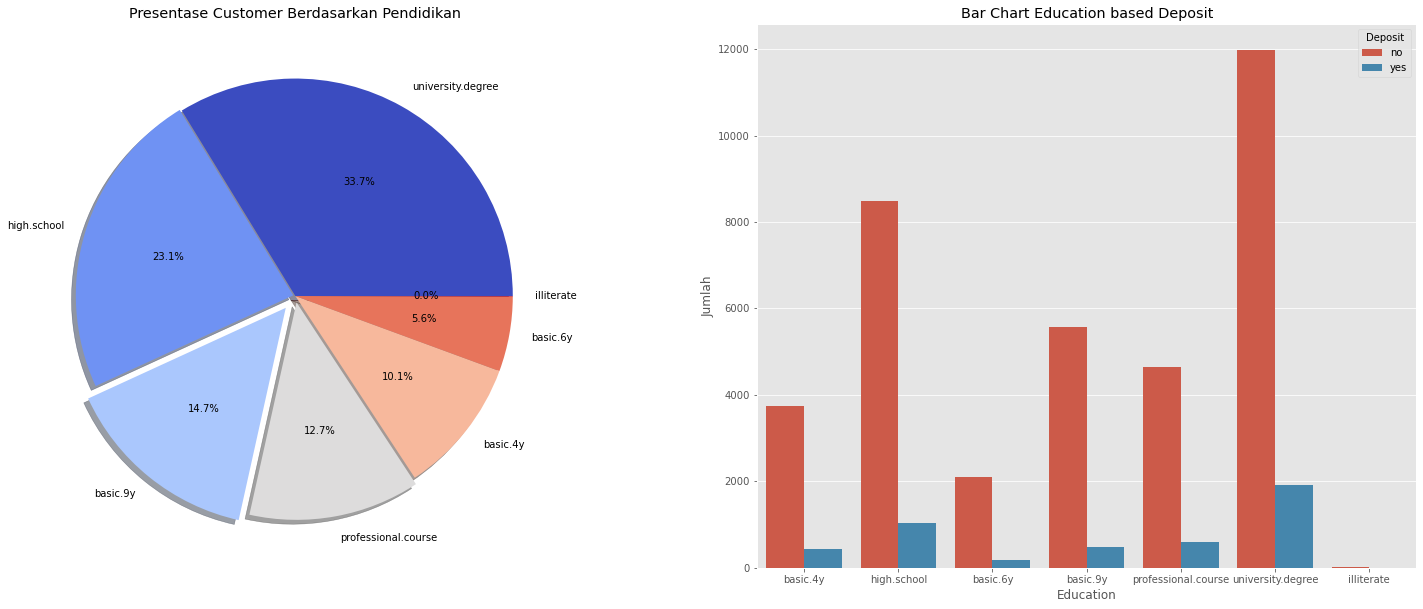

In [34]:
fig, ax = plt.subplots(1,2,figsize=(26,10))

# presentase "education"
df['education'].value_counts().plot(
    kind='pie',
    ax=ax[0],
    autopct='%.1f%%',
    cmap='coolwarm',
    explode=[0,0.01,0.07,0.03,0,0,0],
    shadow=True)
ax[0].set_title('Presentase Customer Berdasarkan Pendidikan')
ax[0].set_ylabel('')

# Barchart besaran setiap status pendidikan terhadap setiap kelas target
sns.countplot(x='education',
              hue='deposit',
              data=df)
ax[1].set_title('Bar Chart Education based Deposit')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Education')
ax[1].legend(title='Deposit')

**Kesimpulan:** Dapat dilihat pada visualisasi diatas bahwa data didominasi oleh kategori pendidikan **university degree**. Kategori pendidikan ini memberikan jumlah berlangganan deposit untuk kelas 'No' dan 'Yes' tertinggi dibanding 5 kategori pendidikan lainnya.

## 4. Pemodelan
***
Pada bagian ini, saya akan melakukan pemilihan feature dan target serta melakukan splitting data dan akan dilakukan scaler. Tujuan dari dilakukan scaler ini yaitu untuk **menghindari terjadinya outliers** dalam pembuatan model nantinya. <br> <br>
Model klasifikasi Machine Learning yang digunakan pada tugas ini yaitu:
- Logistic Regression
- KNN
- SVM
- Decision Tree
- Random Forest
- Naive Bayes

In [35]:
# copy df
df_new = df.copy()

# scaler numeric coloumns
num_cols = ['age',
 'duration',
 'campaign',
 'number of days passed',
 'previous',
 'level of job variety',
 'consumer price index',
 'consumer confidence index',
 'rate euribor 3 month',
 'number of employees']
df_new[num_cols] = StandardScaler().fit_transform(df_new[num_cols])

df_new.head()

,age,duration,campaign,number of days passed,previous,level of job variety,consumer price index,consumer confidence index,rate euribor 3 month,number of employees,...,marital,education,default,housing,loan,contact,month,day,poutcome,deposit
0,1.533034,0.010471,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,1.628993,-0.421501,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,-0.290186,-0.124520,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,-0.002309,-0.413787,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,1.533034,0.187888,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [36]:
# Melakukan encoder pada categorical columns

encode = LabelEncoder()
df_new['job'] = encode.fit_transform(df_new['job'])
df_new['marital'] = encode.fit_transform(df_new['marital'])
df_new['education'] = encode.fit_transform(df_new['education'])
df_new['default'] = encode.fit_transform(df_new['default'])
df_new['housing'] = encode.fit_transform(df_new['housing'])
df_new['loan'] = encode.fit_transform(df_new['loan'])
df_new['contact'] = encode.fit_transform(df_new['contact'])
df_new['month'] = encode.fit_transform(df_new['month'])
df_new['day'] = encode.fit_transform(df_new['day'])
df_new['poutcome'] = encode.fit_transform(df_new['poutcome'])
df_new['deposit'] = encode.fit_transform(df_new['deposit'])

df_new

,age,duration,campaign,number of days passed,previous,level of job variety,consumer price index,consumer confidence index,rate euribor 3 month,number of employees,...,marital,education,default,housing,loan,contact,month,day,poutcome,deposit
0,1.533034,0.010471,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,1,0,0,0,0,1,6,1,1,0
1,1.628993,-0.421501,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,1,3,0,0,0,1,6,1,1,0
2,-0.290186,-0.124520,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,1,3,0,1,0,1,6,1,1,0
3,-0.002309,-0.413787,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,1,1,0,0,0,1,6,1,1,0
4,1.533034,0.187888,-0.565922,-0.164012,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,1,3,0,0,1,1,6,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.292025,-0.565922,-0.164012,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,1,5,0,1,0,0,7,0,1,1
41184,0.573445,0.481012,-0.565922,-0.164012,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,1,5,0,0,0,0,7,0,1,0
41185,1.533034,-0.267225,-0.204909,-0.164012,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,1,6,0,1,0,0,7,0,1,0
41186,0.381527,0.708569,-0.565922,-0.164012,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,...,1,5,0,0,0,0,7,0,1,1


In [37]:
# Memilih dan memisahkan feature dan Target

# pilih feature
X = df_new.drop('deposit', axis=1)

In [38]:
# pilih target
y = df_new['deposit']

In [39]:
# splitting data 80% training 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)


print('Shape training feature:', X_train.shape)
print('Shape testing feature:', X_test.shape)
print('Shape training label:', y_train.shape)
print('Shape training label:', y_test.shape)

Shape training feature: (32950, 20)
Shape testing feature: (8238, 20)
Shape training label: (32950,)
Shape training label: (8238,)


## 5. Logistic Regression
***
Pada bagian ini, saya akan mengimplementasikan logistic regression dengan scikit-learn

In [40]:
model=LogisticRegression()
model.fit(X_train, y_train)

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_pred = model.predict(X_test)

In [42]:
print(accuracy_score(y_test, y_pred))

matrix=confusion_matrix(y_test, y_pred)
print(matrix)

0.9083515416363195
[[7091  203]
 [ 552  392]]


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7294
           1       0.66      0.42      0.51       944

    accuracy                           0.91      8238
   macro avg       0.79      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



Text(0.5, 1.0, 'Confusion Metrics for Logistic Regression')

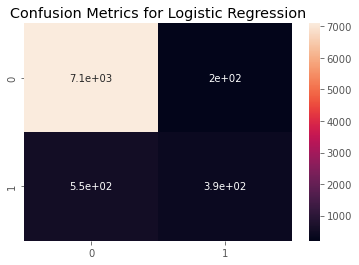

In [44]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
plt.title('Confusion Metrics for Logistic Regression')

In [45]:
tn, fp, fn, tp = matrix.ravel()
print(f'True Negatif (TN) = {tn}')
print(f'False Positif (FP) = {fp}')
print(f'False Negatif (FN) = {fn}')
print(f'True Positif (TP) = {tp}')

True Negatif (TN) = 7091
False Positif (FP) = 203
False Negatif (FN) = 552
True Positif (TP) = 392


**Kesimpulan:** Dapat dilihat dengan menggunakan pemodelan Logistic Regression didapatkan hasil akurasi prediksi yaitu 90.8% (0.9083515416363195) dengan jumlah yaitu:
1. True Negatif (TN) = 7091
2. False Positif (FP) = 203
3. False Negatif (FN) = 552
4. True Positif (TP) = 392 <br>

Bisa dikatakan hasil akurasi cukup baik dengan nilai 90.8%

## 6. K-Nearest Neighbors (KNN)
***
Pada bagian ini, saya akan implementasikan K-Nearest Neighbors (KNN) dengan scikit-learn

In [46]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred1 = knn.predict(X_test)

In [48]:
print('Akurasi:', accuracy_score(y_test,y_pred1))

matrix = confusion_matrix(y_test, y_pred1)
print('confusion matriks \n', matrix)

Akurasi: 0.9010682204418549
confusion matriks 
 [[7038  256]
 [ 559  385]]


In [49]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7294
           1       0.60      0.41      0.49       944

    accuracy                           0.90      8238
   macro avg       0.76      0.69      0.72      8238
weighted avg       0.89      0.90      0.89      8238



Text(0.5, 1.0, 'Confusion Metrics for KNN')

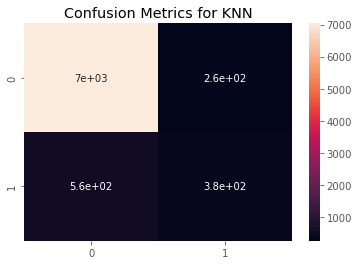

In [50]:
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True)
plt.title('Confusion Metrics for KNN')

In [51]:
tn, fp, fn, tp = matrix.ravel()
print(f'True Negatif (TN) : {tn} ')
print(f'False Positif (FP) : {fp} ')
print(f'False Negatif (FN) : {fn} ')
print(f'True Positif (TP) : {tp} ')

True Negatif (TN) : 7038 
False Positif (FP) : 256 
False Negatif (FN) : 559 
True Positif (TP) : 385 


**Kesimpulan:** Dapat dilihat dengan menggunakan pemodelan K-Nearest Neighbors (KNN) didapatkan hasil akurasi prediksi yaitu 90.1% (0.9010682204418549) dengan jumlah yaitu:
1. True Negatif (TN) : 7038 
2. False Positif (FP) : 256 
3. False Negatif (FN) : 559 
4. True Positif (TP) : 385 <br>

Bisa dikatakan hasil akurasi cukup baik dengan nilai 90.1%

## 7. Support Vector Machine (SVM)
***
Pada bagian ini, saya akan implementasikan Support Vector Machine (SVM) dengan scikit-learn

In [52]:
svm = svm.SVC()
svm.fit(X_train, y_train)

SVC()

In [53]:
y_pred2 = svm.predict(X_test)

In [54]:
print('Akurasi:', accuracy_score(y_test, y_pred2))

matrix=confusion_matrix(y_test, y_pred2)
print('confusion matrix \n', matrix)

Akurasi: 0.9061665452779801
confusion matrix 
 [[7142  152]
 [ 621  323]]


In [55]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7294
           1       0.68      0.34      0.46       944

    accuracy                           0.91      8238
   macro avg       0.80      0.66      0.70      8238
weighted avg       0.89      0.91      0.89      8238



Text(0.5, 1.0, 'Confusion Metrics for SVM')

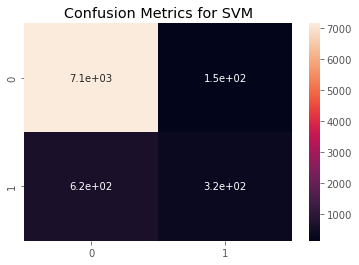

In [56]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True)
plt.title('Confusion Metrics for SVM')

In [57]:
tn, fp, fn, tp = matrix.ravel()
print(f'True Negatif (TN) : {tn} ')
print(f'False Positif (FP) : {fp} ')
print(f'False Negatif (FN) : {fn} ')
print(f'True Positif (TP) : {tp} ')

True Negatif (TN) : 7142 
False Positif (FP) : 152 
False Negatif (FN) : 621 
True Positif (TP) : 323 


**Kesimpulan:** Dapat dilihat dengan menggunakan pemodelan Support Vector Machine (SVM) didapatkan hasil akurasi prediksi yaitu 90.6% (0.9061665452779801) dengan jumlah yaitu:
1. True Negatif (TN) : 7142 
2. False Positif (FP) : 152 
3. False Negatif (FN) : 621 
4. True Positif (TP) : 323 <br>

Bisa dikatakan hasil akurasi cukup baik dengan nilai 90.6%

## 8. Decision Tree
***
Pada bagian ini, saya akan implementasikan Decision Tree dengan scikit-learn

In [58]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
y_pred3 = dt.predict(X_test)

In [60]:
print('Akurasi:', accuracy_score(y_test, y_pred3))

matrix=confusion_matrix(y_test, y_pred3)
print('confusion matrix \n', matrix)

Akurasi: 0.8860160233066279
confusion matrix 
 [[6794  500]
 [ 439  505]]


In [61]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7294
           1       0.50      0.53      0.52       944

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



Text(0.5, 1.0, 'Confusion Metrics for Decision Tree')

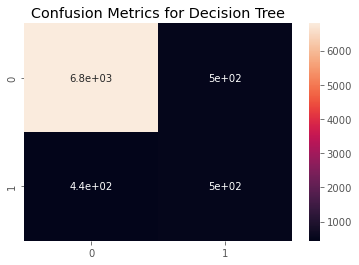

In [62]:
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True)
plt.title('Confusion Metrics for Decision Tree')

In [63]:
tn, fp, fn, tp = matrix.ravel()
print(f'True Negatif (TN) : {tn} ')
print(f'False Positif (FP) : {fp} ')
print(f'False Negatif (FN) : {fn} ')
print(f'True Positif (TP) : {tp} ')

True Negatif (TN) : 6794 
False Positif (FP) : 500 
False Negatif (FN) : 439 
True Positif (TP) : 505 


**Kesimpulan:** Dapat dilihat dengan menggunakan pemodelan Decision Tree didapatkan hasil akurasi prediksi yaitu 88.7% (0.8874726875455208) dengan jumlah yaitu:
1. True Negatif (TN) : 6794 
2. False Positif (FP) : 500 
3. False Negatif (FN) : 439 
4. True Positif (TP) : 505 <br>

Bisa dikatakan hasil akurasi cukup baik dengan nilai 88.7%

## 9. Random Forest
***
Pada bagian ini, saya akan implementasikan Random Forest dengan scikit-learn

In [64]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
y_pred4 = rf.predict(X_test)

In [66]:
print("Akurasi:", accuracy_score(y_test, y_pred4))

matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matriks \n', matrix)

Akurasi: 0.9141781985918912
Confusion Matriks 
 [[7091  203]
 [ 552  392]]


In [67]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7294
           1       0.66      0.51      0.58       944

    accuracy                           0.91      8238
   macro avg       0.80      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238



Text(0.5, 1.0, 'Confusion Metrics for Random Forest')

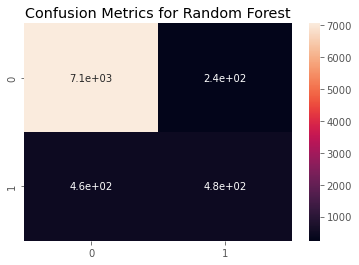

In [68]:
sns.heatmap(confusion_matrix(y_test, y_pred4), annot=True)
plt.title("Confusion Metrics for Random Forest")

In [69]:
tn, fp, fn, tp = matrix.ravel()
print(f'True Negatif (TN) : {tn} ')
print(f'False Positif (FP) : {fp} ')
print(f'False Negatif (FN) : {fn} ')
print(f'True Positif (TP) : {tp} ')

True Negatif (TN) : 7091 
False Positif (FP) : 203 
False Negatif (FN) : 552 
True Positif (TP) : 392 


**Kesimpulan:** Dapat dilihat dengan menggunakan pemodelan Random Forest didapatkan hasil akurasi prediksi yaitu 91.4% (0.9142995872784656) dengan jumlah yaitu:
1. True Negatif (TN) : 7091 
2. False Positif (FP) : 203 
3. False Negatif (FN) : 552 
4. True Positif (TP) : 392  <br>

Bisa dikatakan hasil akurasi cukup baik dengan nilai 91.4%

## 10. Naive Bayes
***
Pada bagian ini, saya akan implementasikan Naive Bayes dengan scikit-learn

In [70]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [71]:
y_pred5 = nb.predict(X_test)

In [72]:
print('Akurasi:', accuracy_score(y_test, y_pred5))

matrix=confusion_matrix(y_test, y_pred5)
print('confusion matrix \n', matrix)

Akurasi: 0.7232337946103423
confusion matrix 
 [[5175 2119]
 [ 161  783]]


In [73]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82      7294
           1       0.27      0.83      0.41       944

    accuracy                           0.72      8238
   macro avg       0.62      0.77      0.61      8238
weighted avg       0.89      0.72      0.77      8238



Text(0.5, 1.0, 'Confusion Metrics for Naive Bayes')

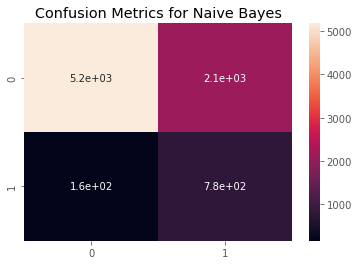

In [74]:
sns.heatmap(confusion_matrix(y_test, y_pred5), annot=True)
plt.title('Confusion Metrics for Naive Bayes')

In [75]:
tn, fp, fn, tp = matrix.ravel()
print(f'True Negatif (TN) : {tn} ')
print(f'False Positif (FP) : {fp} ')
print(f'False Negatif (FN) : {fn} ')
print(f'True Positif (TP) : {tp} ')

True Negatif (TN) : 5175 
False Positif (FP) : 2119 
False Negatif (FN) : 161 
True Positif (TP) : 783 


**Kesimpulan:** Dapat dilihat dengan menggunakan pemodelan Naive Bayes didapatkan hasil akurasi prediksi yaitu 72.3% (0.7232337946103423) dengan jumlah yaitu:
1. True Negatif (TN) : 5175 
2. False Positif (FP) : 2119 
3. False Negatif (FN) : 161 
4. True Positif (TP) : 783 <br>

Bisa dikatakan hasil akurasi cukup rendah dengan nilai 72.3% karena nilai tersebut jika dibandingkan dengan model lain cukup jauh nilai akurasinya.

## 11. Overall Analysis (Algorithm Analysys)
***

In [76]:
print("Logistic Regression:", accuracy_score(y_test, y_pred))
print("Decision Tree:", accuracy_score(y_test, y_pred3))
print("Random Forest:", accuracy_score(y_test, y_pred4))
print("SVM:", accuracy_score(y_test, y_pred2))
print("Naive Bayes:", accuracy_score(y_test, y_pred5))
print("KNN:", accuracy_score(y_test, y_pred1))

Logistic Regression: 0.9083515416363195
Decision Tree: 0.8860160233066279
Random Forest: 0.9141781985918912
SVM: 0.9061665452779801
Naive Bayes: 0.7232337946103423
KNN: 0.9010682204418549


### Pemodelan dengan Nilai Akurasi Terbaik
Berdasarkan analisis beberapa pemodelan yang telah dilakukan, maka dapat disimpulkan bahwa pemodelan yang menghasilkan nilai akurasi atau prediksi yang paling bagus yaitu pemodelan dengan menggunakan metode **Random Forest**. Nilai akurasi yang didapatkan yaitu 91.4% (0.9142995872784656).

### Pemodelan dengan Nilai Akurasi Terendah
Untuk hasil pemodelan dengan hasil nilai akurasi atau prediksi paling rendah yaitu pemodelan dengan menggunakan **Naive Bayes**. Nilai yang didapatkan yaitu 72.3% (0.7232337946103423). Jika dibandingkan dengan model yang lain cukup jauh perbandingannya dimana model lain hasil akurasinya berada di sekitar 88% - 92%.

### Kesimpulan
Jadi, untuk dataset **bank-additional-full.csv** related with direct marketing campaigns (phone calls) of a Portuguese banking institution. Untuk memprediksi apakah client akan subscribe (yes/no) sebuah term deposit (variable y), maka pemodelan yang cocok dilakukan adalah dengan menggunakan pemodelan **Random Forest**.

In [77]:
# write the results in csv file for Random Forest

predictions = pd.DataFrame(y_pred4, columns=["predictions"]).to_csv("A3_RF_Deposit_Predict.csv")

In [78]:
# simpan model kedalam file dengan pickle

import pickle
pickle.dump(rf, open('D:\Desktop\DATA SCIENCE MSIB 3 (SYA)\PYTN_Assgn_3_10_Syaima Radestya\model_classifier.pkl','wb'))